# Load libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# All features


In [ ]:
df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam']],
                 pd.read_csv('drive/My Drive/ppnnw5.csv').iloc[:,10:],
                 pd.read_csv('drive/My Drive/ppnnw6.csv').iloc[:,10:]], axis = 1)

df1 = df1.loc[df1['die'] == 'no']
df1['Gen'] = 1
df2 = pd.concat([pd.read_csv('drive/My Drive/h1w5.csv')[['die']],
                 pd.read_csv('drive/My Drive/h1w5.csv').iloc[:, 5:], 
                 pd.read_csv('drive/My Drive/h1w6p1.csv').iloc[:,5:],
                 pd.read_csv('drive/My Drive/h1w6p2.csv').iloc[:,5:]], axis = 1)
df2 = df2.loc[df2['die'] == 'no']
df2['Gen'] = 0

data = pd.concat([df1, df2], axis = 0).reset_index(drop = True)

Model performance with all features

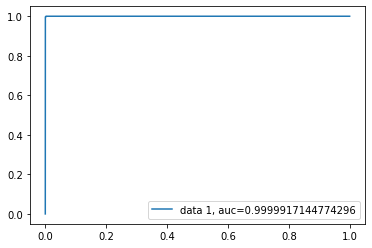

correct/TP: 1032 ** FP: 0 **  TN: 3847 ** FN: 19 ** cv_bin mean: 0.989437 ** cv_bin std: 0.003518 ** cv_mac mean: 0.991985 ** cv_mac std: 0.002445 ** f1bin: 0.990879 ** f1mac: 0.994208


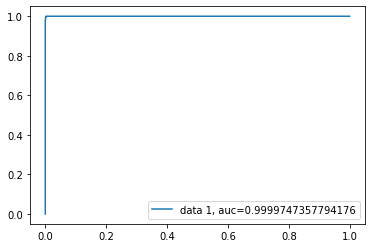

correct/TP: 995 ** FP: 2 **  TN: 3882 ** FN: 19 ** cv_bin mean: 0.987905 ** cv_bin std: 0.004197 ** cv_mac mean: 0.992572 ** cv_mac std: 0.002275 ** f1bin: 0.989557 ** f1mac: 0.993430


KeyboardInterrupt: ignored

In [ ]:
temp = []
for i in range(5):
  #Splitting features and labels
  X = data.iloc[:, 3:].values.astype(float)
  y = data.iloc[:, 0].values.astype(float)

  # Splitting the dataset into the Training set and Test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

  # Feature Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  ### Training the decision tree model on the Training set
  classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
  classifier.fit(X_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)

  # Making the Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)

  #evaluation
  cv_bin = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
  cv_mac = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
  f1bin = f1_score(y_test, y_pred, average='binary')
  f1mac = f1_score(y_test, y_pred, average='macro')

  #AUC
  acc = metrics.accuracy_score(y_test, y_pred)
  y_pred_proba = classifier.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

  temp.append((cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))
  print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
        % (cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))
  
rfallf = pd.DataFrame(temp, columns = ['TP', 'FP', 'TN', 'FN', 'cv_bin mean', 'cv_bin std', 'cv_mac mean', 'cv_man std', 'f1bin', 'f1mac'])

In [ ]:
dtallf.to_clipboard(index = False)

LOFO CV

In [ ]:
temp = []

df2test = df2.sample(frac = 0.3)
df2train = df2[~df2.index.isin(df2test.index)]

for fam in set(df1['Fam'].to_list()):
    df1test = df1.loc[df1['Fam'] == fam]
    df1train = df1.loc[~(df1['Fam'] == fam)]
    df1train = df1train.loc[df1train['die'] == 'no']
    
    X_train = pd.concat([df1train.iloc[:,3:], df2train.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_train = pd.concat([df1train.iloc[:,0], df2train.iloc[:,-1]], axis = 0).reset_index(drop = True)

    X_test = pd.concat([df1test.iloc[:,3:], df2test.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_test = pd.concat([df1test.iloc[:,0], df2test.iloc[:,-1]], axis = 0).reset_index(drop = True)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Fitting Random Forest Classification to the Training set
    classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #evaluation
    f1bin = f1_score(y_test, y_pred, average='binary')
    f1mac = f1_score(y_test, y_pred, average='macro')
    
    temp.append((fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))

    print('Fam: %s ** total: %d ** correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** f1bin: %f ** f1mac: %f' 
          % (fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))
  
dtlofocv_allf = pd.DataFrame(temp, columns = ['Fam', 'Total', 'Correct/TP', 'FP', 'TN', 'FN', 'f1bin', 'f1mac']) 

## Model performance with 194 features

In [ ]:
l =    ['CAATCG', 'GGTA', 'GTTGA', 'CATACG', 'TGAT', 'GTCGAA', 'CCAATT', 'TGTCGA', 'GTTGAC', 
        'CGGTTA', 'CGATA', 'TAGCGT', 'AAAAAA', 'GGTTGA', 'AAAAA', 'CAAT', 'CGTCAA', 'CGGTAA', 
        'CGTTGA', 'CAAC', 'ACCAAT', 'TTGACG', 'TCAATC', 'GTTG', 'CAATTG', 'CGCAAT', 'GGTT', 
        'TTGTCG', 'TCAA', 'CCAAT', 'ATACGC', 'CGATAG', 'TTGA', 'CATCAA', 'GTTGAT', 'ATACGG', 
        'CGATC', 'GTTGGT', 'GATC', 'CCGATA', 'GTCAAT', 'CGATAA', 'CGCGTT', 'ATCGTA', 'TCGGTT', 
        'ATCAAC', 'ATTGG', 'TCGA', 'GCAATC', 'CAATCT', 'GCGTAC', 'TTCGAC', 'GGTTG', 'TCCAAT', 
        'CGTAGT', 'TTGCG', 'CGGTT', 'CGATTA', 'ACGGTT', 'ATCAAT', 'TTGCGC', 'CAATC', 'CGAT', 
        'GCGTTA', 'CCGTTA', 'TTGAC', 'CGTCGA', 'ATAGCG', 'GTTGAG', 'TATCCG', 'GGTAGT', 'CGTTGC', 
        'TCGGTA', 'TGGTT', 'AGGTTG', 'AGGAA', 'TCGAGT', 'TCAAT', 'ATAGGG', 'GTACGC', 'ACGCAA', 
        'GGTACG', 'TCCTG', 'CAGAG', 'TTGATG', 'GTCGAC', 'CGGTTG', 'ACATCG', 'CAGC', 'TTTTTT', 
        'GGTATG', 'TAGGGT', 'GGTTC', 'TGGTTC', 'CGCGTA', 'AACC', 'CTCGAT', 'AACGGT', 'ATCAA', 
        'TCCAAC', 'AAAATG', 'AAATG', 'GTTGT', 'GTCATA', 'TCAATT', 'ACAATC', 'AATAAA', 'AATTGG', 
        'ATCATA', 'GGCGTA', 'AAATAA', 'TCAAC', 'CTAACG', 'ACGATA', 'TCAACC', 'ACCGGT', 'CAGA', 
        'GCATAC', 'CTGTA', 'CGGTA', 'GTTGC', 'CTGT', 'ATTGGT', 'GGTCAA', 'CGTA', 'GTCAA', 'TCGCAA', 
        'AGCTG', 'ATGGTA', 'CGCAA', 'GTCAAA', 'GATTGG', 'CTGGA', 'TTCGCA', 'ATCCAA', 'AACCGA', 
        'CCGCAA', 'GTCGA', 'TAACAC', 'TTTTTA', 'ATAACG', 'TATGGT', 'TTGGCG', 'TGGT', 'TCCAT', 
        'CAATT', 'GCGTAA', 'TCGT', 'CCGTAA', 'GGGTTA', 'CAATTA', 'AGCCT', 'TAGCGA', 'TACCAC', 
        'CGCAAA', 'ATATCG', 'CTGCA', 'CGTACC', 'ATCGGT', 'TCGATA', 'TCGTTG', 'TTGGT', 'CGACCA', 
        'GAAGA', 'GT', 'CTGAG', 'ATGCGA', 'CAG', 'GGTAC', 'GGTTGT', 'CCATAC', 'GTTGCG', 'GATAGG', 
        'GAT', 'CAA', 'CATACC', 'AACCGT', 'TTGCGA', 'CGTAT', 'CGTAAT', 'CGATGT', 'TTCCT', 'AC', 
        'CGATCG', 'CGCTAA', 'CACAAC', 'TACC', 'TTGAG', 'CCAATC', 'TATGCG', 'TATCG', 'AGCAG', 'GGTAG', 
        'TCGTAG', 'AACCCG', 'AGAG', 'GAATCA', 'GAAGTT', 'GAAGAT', 'TCTTTA', 'CGAAGA', 'TCGAT', 'CAGT', 
        'CTTGA', 'TACG', 'CGTATG', 'CAAACA', 'TTCG', 'AGGGTT', 'TCGACC', 'CGTT', 'CTGTGA', 'TCAGT', 
        'CAGCT', 'GTGTCT', 'TGTAAA', 'ATGCCT', 'TAAACC', 'ATACCG', 'AACCG', 'CAACAA', 'CATTGG', 
        'GTACTC', 'TGTGAA', 'ATACCC', 'AACACC', 'TGCAGT', 'ATGTAA', 'AGGA', 'AAGCAC', 'GTAGGT', 
        'GTAGCT', 'CGTAGA', 'ACCCAA', 'CCAATA', 'TATTTT', 'CTTG', 'TTTTT', 'GCAATG', 'GTCGTC', 
        'GTCTAA', 'ATGCTG', 'CGTATC', 'TAGTTA', 'CAATCC', 'TTGGTC', 'TCGCA', 'GTCCAA', 'TAGGTC', 
        'CGAC', 'TGATC', 'CATAAC', 'TGATTA', 'CAATAG', 'TCTCGA', 'CTACAG', 'CTTTGG', 'TACGTC', 
        'CTCAGT', 'TTGG', 'TATTTG', 'AAACTG', 'TTCGCC', 'TGACAC', 'ACTCGT', 'CACAAA', 'TGACGA', 
        'CTTGAT', 'TCGACT', 'TGATCG', 'TAACG', 'ATATTT', 'TAGAGG', 'CCGATC', 'TCAACG', 'GTCGAT', 
        'GCGATA', 'ATGCCG', 'ACAAC', 'ACACCG', 'TTACCG', 'CGTAC', 'GTATTT', 'TTGCGT', 'CTCAG', 
        'CTTGCG', 'TTTCGA', 'TCGTA', 'TCCTGA', 'TACGCC', 'GAAG', 'GCTATC', 'CTAGTG', 'CCCTAT', 
        'ACCAGA', 'GTACTG', 'CATTTA', 'GTTAGA', 'ATAATC', 'AGGCAT', 'GATGTT', 'TAGATT', 'CAACGC', 
        'CGATTG', 'ACATTT', 'AAATGT', 'CCGAT', 'GTTATA', 'TGTTG', 'TTCAAT', 'GTCGTT', 'ACCGAT', 
        'CGATAC', 'TCGATG', 'CCACAC', 'CCAT', 'GGGTGT', 'CTATC', 'GTTGTG', 'CTTTCG', 'ATAGAT', 
        'TATGGC', 'AGCTGG', 'CTCT', 'CACAGA', 'TGGTTG', 'CTAG', 'ACGGGT', 'CATTTT', 'TTTTAG', 
        'CATAAT', 'AACCCA', 'CATAG', 'ACGGGA', 'GGTGTT', 'CCGTCC', 'AAGACC', 'ATTGCG', 'CAGTTT', 
        'TGAAGA', 'ATCG', 'AATTTG', 'TCAAAA', 'CCAAC', 'ATCA', 'TGCAG', 'CAAATT', 'ACGTTA', 'CGACTA', 
        'ACCCCT', 'CCCACT', 'CCGTAT', 'CAACGG', 'TCCATC', 'ACTAGG', 'AAGCAG', 'TTTGTA', 'GGGTCA', 
        'CGGTGT', 'GCAGTT', 'ACAATT', 'ACAACC', 'ACGTTG', 'AAATAC', 'TTCAGT', 'AGTTGA', 'GACATA', 
        'CTGACT', 'CTGTTT', 'CAAGGG', 'ATTTTA', 'CAAAC', 'TAGG', 'CTGAA', 'GCGATC', 'CAACCA', 
        'ATTCGC', 'CAATTC', 'CGTTAG', 'CACTAG', 'AGCAGT', 'CTTCTT', 'CAACTG', 'GGTGAG', 'TTCAG', 
        'AAATA', 'CGTTGT', 'TATCGC', 'AGCCA', 'GGTGAT', 'GGATAA', 'GCTGTA', 'GAAGTA', 'TTGAT', 
        'ACCGAC', 'TAGTCG', 'CTGTG', 'ATCTA', 'ACACCA', 'ATGGAT', 'CCTC', 'TGAAG', 'CGCACT', 'TAACCC', 
        'ACGTCA', 'TGATAG', 'TCGAA', 'ATACCA', 'AGGGTA', 'GATCGT', 'ATCCAG', 'TCAGC', 'GCAGAT', 
        'TACCTG', 'ACCCGT', 'CCATA', 'AATTGA', 'AGGTAC', 'GGT', 'CTGCCT', 'ACTAGT', 'TTGTTC', 'TTACTT', 
        'TTTTA', 'CAGAC', 'GCGTAG', 'GAGCAT', 'ATC', 'ATGG', 'AAGCCT', 'CACTCG', 'TCAGTG', 'CTGGAG', 
        'CTTCCT', 'CGTCAT', 'CCGTTG', 'TAGTTG', 'CGTCCA', 'GCCCAG', 'ATGGT', 'TACAC', 'GATAGT', 
        'ACAACA', 'CTATAG', 'AATGGT', 'AGAAA', 'ATGACG', 'GATAAC', 'CAGCTT', 'CATGAT', 'TTCGTT', 
        'GTGTAC', 'TTGAAC', 'CACAAG', 'AATTG', 'GTCA', 'TGCCT', 'CTCGAC', 'CTATCT', 'TGACGG', 
        'CCATAT', 'ACCATT', 'AAAGAG', 'ATTAGA', 'GCGTAT', 'CGTTG', 'TACGT', 'ACGAT', 'TCCATG', 
        'CCTG', 'GTCAAC', 'TTGTGA', 'ACTAG', 'GCGACA', 'TGAAGC', 'TACAAC', 'ACGGTA', 'TAGCGG', 
        'ATTGAT', 'ATCACG', 'ATTCGG', 'TATTTC', 'TAAAAT', 'GTATCG', 'CAACCG', 'CCCCAA', 'CGTAAC',
        'CTAGGG', 'ATCAAA', 'ATTGGA', 'TCGTC', 'GCAACT', 'CACTA', 'CCATAG', 'CACAA', 'ATAGGT', 
        'ACGTAG', 'CATGCG', 'ATGATC', 'CCGTCA', 'CGATT', 'TTTGAC', 'CGTTA', 'TCTGTA', 'TAGATC', 
        'CATAGC', 'TCCAGA', 'ACACTC', 'CGATCA', 'GGATGT', 'TTACGC', 'AACTGC', 'ATCCAT', 'CCACTC', 
        'GTCCAT', 'ACCACT', 'GCGCGG', 'GTCAAG', 'AAGTGT', 'ATGATA', 'AGCT', 'CTAGAG', 'GCAGA', 
        'GTCATG', 'CTGTAG', 'TCATGC', 'CAGAA', 'ACACGG', 'CGGTAT', 'TTTTAA', 'TCAAAG', 'TTACAC', 
        'TCCGCT', 'CCCCCC', 'GCACAA', 'TTCTGT', 'TATGTA', 'GGTAAC', 'TAGCG', 'ATACC', 'GGTATC', 
        'ACAA', 'TCTGT', 'ACTA', 'TCCGTA', 'CTATCA', 'CGCATA', 'TCTCAG', 'CATGGA', 'ATCT', 'TGCGAC', 
        'ACAC', 'GACCAT', 'CAGCAT', 'ACG', 'CTAGTA', 'TTAGCG', 'TAACGA', 'ACTGAG', 'GAAGT', 'CTTGAC', 
        'CGTAGG', 'TCGCTC', 'CTGAAG', 'TTGACA', 'CGGCAA', 'CTCAAG', 'ACGTA', 'CAAGTG', 'TCAGA', 'GAGCAA', 
        'CGAAAG', 'ACTTTT', 'TACCG', 'GTTGTT', 'GCCATA', 'GCGTA', 'ACGA', 'TCGACG', 'ATACG', 'GTAC', 
        'TTGCCG', 'GGCGGG', 'CTAGT', 'GAACCA', 'TTTCTG', 'TCTTGA', 'TAAAA', 'TTGAGG', 'TAACGC', 'TATAGG',
        'GTCGTA', 'GCATTT', 'TACTG', 'TATCGA', 'CGTAA', 'AGGCTT', 'CGTTAT', 'TATC', 'TTGATT', 'TGCAGA', 
        'TAGGCG', 'GCTTGA', 'ATCTAT', 'GGTTAG', 'TACAAT']

c = [f for f in l if len(f) < 6]
b = [f for f in l if len(f) == 6]
b1 = [f for f in b if f[0] == 'A' or f[0] == 'T']
b2 = [f for f in b if f[0] == 'G' or f[0] == 'C']

df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam'] + c], 
                 pd.read_csv('drive/My Drive/ppnnw6.csv')[b]], axis = 1)

df1 = df1.loc[df1['die'] == 'no']
df1['Gen'] = 1

df2 = pd.concat([pd.read_csv('drive/My Drive/h1w5.csv')[['die'] + c], 
                 pd.read_csv('drive/My Drive/h1w6p1.csv')[b1],
                 pd.read_csv('drive/My Drive/h1w6p2.csv')[b2]], axis = 1)
df2 = df2.loc[df2['die'] == 'no']
df2['Gen'] = 0

data = pd.concat([df1, df2], axis = 0).reset_index(drop = True)

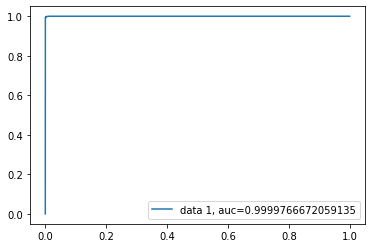

correct/TP: 973 ** FP: 1 **  TN: 3911 ** FN: 13 ** cv_bin mean: 0.991293 ** cv_bin std: 0.003575 ** cv_mac mean: 0.994484 ** cv_mac std: 0.002069 ** f1bin: 0.992857 ** f1mac: 0.995535


KeyboardInterrupt: ignored

In [ ]:
temp = []
for i in range(5):
  #Splitting features and labels
  X = data.iloc[:, 3:].values.astype(float)
  y = data.iloc[:, 0].values.astype(float)

  # Splitting the dataset into the Training set and Test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

  # Feature Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  ### Training the decision tree model on the Training set
  classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
  classifier.fit(X_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)

  # Making the Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)

  #evaluation
  cv_bin = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
  cv_mac = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
  f1bin = f1_score(y_test, y_pred, average='binary')
  f1mac = f1_score(y_test, y_pred, average='macro')

  #AUC
  acc = metrics.accuracy_score(y_test, y_pred)
  y_pred_proba = classifier.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

  temp.append((cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))
  print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
        % (cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))

LOFO CV

In [ ]:
temp = []

df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam'] + c], 
                 pd.read_csv('drive/My Drive/ppnnw6.csv')[b]], axis = 1)
df1['Gen'] = 1

df2test = df2.sample(frac = 0.3)
df2train = df2[~df2.index.isin(df2test.index)]

for fam in set(df1['Fam'].to_list()):
    df1test = df1.loc[df1['Fam'] == fam]
    df1train = df1.loc[~(df1['Fam'] == fam)]
    df1train = df1train.loc[df1train['die'] == 'no']
    
    X_train = pd.concat([df1train.iloc[:,3:], df2train.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_train = pd.concat([df1train.iloc[:,0], df2train.iloc[:,-1]], axis = 0).reset_index(drop = True)

    X_test = pd.concat([df1test.iloc[:,3:], df2test.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_test = pd.concat([df1test.iloc[:,0], df2test.iloc[:,-1]], axis = 0).reset_index(drop = True)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Fitting Random Forest Classification to the Training set
    classifier = DecisionTreeClassifier(criterion = 'entropy')
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #evaluation
    f1bin = f1_score(y_test, y_pred, average='binary')
    f1mac = f1_score(y_test, y_pred, average='macro')
    
    temp.append((fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))

    print('Fam: %s ** total: %d ** correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** f1bin: %f ** f1mac: %f' 
          % (fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))
  
dtlofocv_194f = pd.DataFrame(temp, columns = ['Fam', 'Total', 'Correct/TP', 'FP', 'TN', 'FN', 'f1bin', 'f1mac']) 

Fam: deltaflexiviridae ** total: 4 ** correct/TP: 4 ** FP: 80 **  TN: 4563 ** FN: 0 ** f1bin: 0.090909 ** f1mac: 0.541110
Fam: roniviridae ** total: 4 ** correct/TP: 4 ** FP: 81 **  TN: 4562 ** FN: 0 ** f1bin: 0.089888 ** f1mac: 0.540544
Fam: gammaflexiviridae ** total: 2 ** correct/TP: 2 ** FP: 83 **  TN: 4560 ** FN: 0 ** f1bin: 0.045977 ** f1mac: 0.518479
Fam: alphaflexiviridae ** total: 110 ** correct/TP: 99 ** FP: 86 **  TN: 4557 ** FN: 11 ** f1bin: 0.671186 ** f1mac: 0.830328
Fam: filoviridae ** total: 32 ** correct/TP: 32 ** FP: 86 **  TN: 4557 ** FN: 0 ** f1bin: 0.426667 ** f1mac: 0.708659
Fam: iflaviridae ** total: 76 ** correct/TP: 76 ** FP: 85 **  TN: 4558 ** FN: 0 ** f1bin: 0.641350 ** f1mac: 0.816056
Fam: hepeviridae ** total: 32 ** correct/TP: 32 ** FP: 90 **  TN: 4553 ** FN: 0 ** f1bin: 0.415584 ** f1mac: 0.702899
Fam: virgaviridae ** total: 86 ** correct/TP: 86 ** FP: 81 **  TN: 4562 ** FN: 0 ** f1bin: 0.679842 ** f1mac: 0.835521
Fam: tombusviridae ** total: 136 ** corre

In [ ]:
dtlofocv_allf


# 68 Features

In [ ]:
l =    ['TCAATC', 'CCAATT', 'GTTGAC', 'TGAT', 'GGTT', 'GGTTGA', 'GTTGA',
       'TAGCGT', 'CGGTTA', 'TTGACG', 'CGATA', 'CGTCAA', 'CAATCG', 'CGTTGA',
       'GTCGAA', 'GTTG', 'CGGTAA', 'CATACG', 'AAAAAA', 'ACCAAT', 'TCAA',
       'TTGTCG', 'CGATAG', 'AAAAA', 'CAAC', 'ATACGC', 'CAATTG', 'CCAAT',
       'CGCAAT', 'GGTA', 'CAAT', 'TGTCGA', 'CGAT', 'CAATCT', 'GCGTAC', 'GGTTG',
       'TTGA', 'GTTGGT', 'TCCAAT', 'TTGCG', 'ACGGTT', 'CGATTA', 'ATCAAT',
       'GCAATC', 'ATCAAC', 'GTTGAT', 'GTCAAT', 'CGTCGA', 'ATTGG', 'CGTAGT',
       'ATAGCG', 'CCGATA', 'CAATC', 'CATCAA', 'TTCGAC', 'TTGAC', 'TTGCGC',
       'GCGTTA', 'CCGTTA', 'ATACGG', 'CGCGTT', 'CGATC', 'CGATAA', 'ATCGTA',
       'TCGA', 'TCGGTT', 'GATC', 'CGGTT']

c = [f for f in l if len(f) < 6]
b = [f for f in l if len(f) == 6]
b1 = [f for f in b if f[0] == 'A' or f[0] == 'T']
b2 = [f for f in b if f[0] == 'G' or f[0] == 'C']

df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam'] + c], 
                 pd.read_csv('drive/My Drive/ppnnw6.csv')[b]], axis = 1)

df1 = df1.loc[df1['die'] == 'no']
df1['Gen'] = 1

df2 = pd.concat([pd.read_csv('drive/My Drive/h1w5.csv')[['die'] + c], 
                 pd.read_csv('drive/My Drive/h1w6p1.csv')[b1],
                 pd.read_csv('drive/My Drive/h1w6p2.csv')[b2]], axis = 1)
df2 = df2.loc[df2['die'] == 'no']
df2['Gen'] = 0

data = pd.concat([df1, df2], axis = 0).reset_index(drop = True)

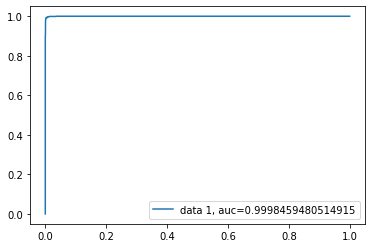

correct/TP: 987 ** FP: 3 **  TN: 3886 ** FN: 22 ** cv_bin mean: 0.988948 ** cv_bin std: 0.003525 ** cv_mac mean: 0.993217 ** cv_mac std: 0.001624 ** f1bin: 0.987494 ** f1mac: 0.992144


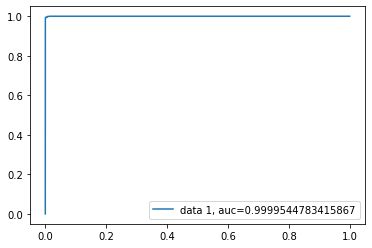

correct/TP: 945 ** FP: 1 **  TN: 3934 ** FN: 18 ** cv_bin mean: 0.988463 ** cv_bin std: 0.006937 ** cv_mac mean: 0.993186 ** cv_mac std: 0.004051 ** f1bin: 0.990047 ** f1mac: 0.993819


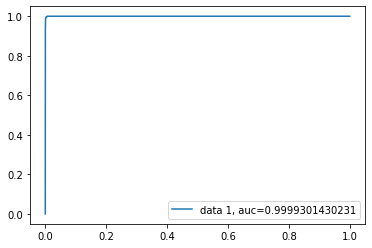

correct/TP: 1021 ** FP: 3 **  TN: 3859 ** FN: 15 ** cv_bin mean: 0.989023 ** cv_bin std: 0.003906 ** cv_mac mean: 0.992237 ** cv_mac std: 0.002727 ** f1bin: 0.991262 ** f1mac: 0.994468


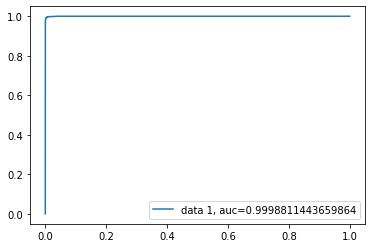

correct/TP: 1051 ** FP: 2 **  TN: 3827 ** FN: 18 ** cv_bin mean: 0.989224 ** cv_bin std: 0.004625 ** cv_mac mean: 0.992800 ** cv_mac std: 0.002798 ** f1bin: 0.990575 ** f1mac: 0.993984


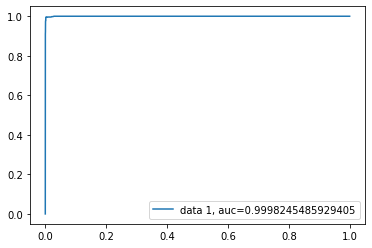

correct/TP: 996 ** FP: 5 **  TN: 3877 ** FN: 20 ** cv_bin mean: 0.988433 ** cv_bin std: 0.003847 ** cv_mac mean: 0.993311 ** cv_mac std: 0.002457 ** f1bin: 0.987605 ** f1mac: 0.992196


In [ ]:
temp = []
for i in range(5):
  #Splitting features and labels
  X = data.iloc[:, 3:].values.astype(float)
  y = data.iloc[:, 0].values.astype(float)

  # Splitting the dataset into the Training set and Test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

  # Feature Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  ### Training the decision tree model on the Training set
  classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
  classifier.fit(X_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)

  # Making the Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)

  #evaluation
  cv_bin = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
  cv_mac = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
  f1bin = f1_score(y_test, y_pred, average='binary')
  f1mac = f1_score(y_test, y_pred, average='macro')

  #AUC
  acc = metrics.accuracy_score(y_test, y_pred)
  y_pred_proba = classifier.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

  temp.append((cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))
  print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
        % (cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))

In [ ]:
temp = []

df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam'] + c], 
                 pd.read_csv('drive/My Drive/ppnnw6.csv')[b]], axis = 1)
df1['Gen'] = 1

df2test = df2.sample(frac = 0.3)
df2train = df2[~df2.index.isin(df2test.index)]

for fam in set(df1['Fam'].to_list()):
    df1test = df1.loc[df1['Fam'] == fam]
    df1train = df1.loc[~(df1['Fam'] == fam)]
    df1train = df1train.loc[df1train['die'] == 'no']
    
    X_train = pd.concat([df1train.iloc[:,3:], df2train.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_train = pd.concat([df1train.iloc[:,0], df2train.iloc[:,-1]], axis = 0).reset_index(drop = True)

    X_test = pd.concat([df1test.iloc[:,3:], df2test.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_test = pd.concat([df1test.iloc[:,0], df2test.iloc[:,-1]], axis = 0).reset_index(drop = True)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Fitting Random Forest Classification to the Training set
    classifier = DecisionTreeClassifier(criterion = 'entropy')
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #evaluation
    f1bin = f1_score(y_test, y_pred, average='binary')
    f1mac = f1_score(y_test, y_pred, average='macro')
    
    temp.append((fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))

    print('Fam: %s ** total: %d ** correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** f1bin: %f ** f1mac: %f' 
          % (fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))
  
dtlofocv_68f = pd.DataFrame(temp, columns = ['Fam', 'Total', 'Correct/TP', 'FP', 'TN', 'FN', 'f1bin', 'f1mac']) 

Fam: deltaflexiviridae ** total: 4 ** correct/TP: 4 ** FP: 71 **  TN: 4572 ** FN: 0 ** f1bin: 0.101266 ** f1mac: 0.546780
Fam: roniviridae ** total: 4 ** correct/TP: 4 ** FP: 68 **  TN: 4575 ** FN: 0 ** f1bin: 0.105263 ** f1mac: 0.548943
Fam: gammaflexiviridae ** total: 2 ** correct/TP: 2 ** FP: 77 **  TN: 4566 ** FN: 0 ** f1bin: 0.049383 ** f1mac: 0.520511
Fam: alphaflexiviridae ** total: 110 ** correct/TP: 100 ** FP: 75 **  TN: 4568 ** FN: 10 ** f1bin: 0.701754 ** f1mac: 0.846268
Fam: filoviridae ** total: 32 ** correct/TP: 31 ** FP: 80 **  TN: 4563 ** FN: 1 ** f1bin: 0.433566 ** f1mac: 0.712384
Fam: iflaviridae ** total: 76 ** correct/TP: 73 ** FP: 99 **  TN: 4544 ** FN: 3 ** f1bin: 0.588710 ** f1mac: 0.788805
Fam: hepeviridae ** total: 32 ** correct/TP: 32 ** FP: 97 **  TN: 4546 ** FN: 0 ** f1bin: 0.397516 ** f1mac: 0.693480
Fam: virgaviridae ** total: 86 ** correct/TP: 83 ** FP: 80 **  TN: 4563 ** FN: 3 ** f1bin: 0.666667 ** f1mac: 0.828827
Fam: tombusviridae ** total: 136 ** corr

In [ ]:
dtlofocv_194f

,Fam,Total,Correct/TP,FP,TN,FN,f1bin,f1mac
0,deltaflexiviridae,4,4,71,4572,0,0.101266,0.546780
1,roniviridae,4,4,68,4575,0,0.105263,0.548943
2,gammaflexiviridae,2,2,77,4566,0,0.049383,0.520511
3,alphaflexiviridae,110,100,75,4568,10,0.701754,0.846268
4,filoviridae,32,31,80,4563,1,0.433566,0.712384
5,iflaviridae,76,73,99,4544,3,0.588710,0.788805
6,hepeviridae,32,32,97,4546,0,0.397516,0.693480
7,virgaviridae,86,83,80,4563,3,0.666667,0.828827
8,tombusviridae,136,136,69,4574,0,0.797654,0.895084
9,marnaviridae,20,20,75,4568,0,0.347826,0.669842
